<a href="https://colab.research.google.com/github/zlibutmatthew/Stock-Prediction-SVM/blob/master/SVM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Using API to Import Data from Yahoo

### Data Attributes:
High: The highest price of the day

Low: The lowest price of the day

Open: The opening price of the day

Close: The Closing price of the day

Volume: Amount of stocks traded in the day

Adjusted Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.

In [2]:
#Get the stock info and store into a dataframe
df = web.DataReader('AAPL', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,26.262501,25.907499,26.0200,26.207500,284298800.0,23.577621
2014-10-24,26.372499,26.132500,26.2950,26.305000,188215600.0,23.665333
2014-10-27,26.370001,26.174999,26.2125,26.277500,136750800.0,23.640593
2014-10-28,26.684999,26.337500,26.3500,26.684999,192243600.0,24.007200
2014-10-29,26.842501,26.590000,26.6625,26.834999,210751600.0,24.142147


In [3]:
'''Nasdaq is a global electronic marketplace for buying and selling securities'''
df_nas = web.DataReader('^IXIC', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_nas.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,4475.549805,4421.560059,4427.439941,4452.790039,1952380000,4452.790039
2014-10-24,4486.259766,4445.850098,4459.459961,4483.720215,1754300000,4483.720215
2014-10-27,4489.600098,4450.290039,4469.020020,4485.930176,1585580000,4485.930176
2014-10-28,4564.290039,4505.109863,4505.729980,4564.290039,1966920000,4564.290039
2014-10-29,4564.439941,4517.020020,4551.370117,4549.229980,2184050000,4549.229980


In [4]:
'''The DJIA is a price-weighted index that tracks 30 large, publicly-owned companies trading 
on the New York Stock Exchange and the NASDAQ.'''
df_dow = web.DataReader('^DJI', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_dow.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,16767.519531,16468.070312,16468.070312,16677.900391,99420000,16677.900391
2014-10-24,16811.710938,16649.720703,16677.039062,16805.410156,90400000,16805.410156
2014-10-27,16836.980469,16729.830078,16796.099609,16817.939453,72580000,16817.939453
2014-10-28,17006.449219,16825.189453,16825.189453,17005.750000,83870000,17005.750000
2014-10-29,17065.500000,16895.380859,17005.070312,16974.310547,76450000,16974.310547


In [5]:
'''S&P 500 tracks the top 500 traded stocks'''
df_snp = web.DataReader('^GSPC', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_snp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,1961.949951,1931.020020,1931.020020,1950.819946,3789250000,1950.819946
2014-10-24,1965.270020,1946.270020,1951.589966,1964.579956,3078380000,1964.579956
2014-10-27,1964.640015,1951.369995,1962.969971,1961.630005,3538860000,1961.630005
2014-10-28,1985.050049,1964.140015,1964.140015,1985.050049,3653260000,1985.050049
2014-10-29,1991.400024,1969.040039,1983.290039,1982.300049,3740350000,1982.300049


In [6]:
'''The Nikkei is short for Japan's Nikkei 225 Stock Average, the leading and most-respected index of Japanese stocks.'''
df_nik = web.DataReader('^N225', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_nik.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,15232.509766,15059.639648,15093.780273,15138.959961,119600.0,15138.959961
2014-10-24,15377.049805,15232.000000,15354.349609,15291.639648,121800.0,15291.639648
2014-10-27,15424.049805,15333.709961,15404.280273,15388.719727,121000.0,15388.719727
2014-10-28,15374.459961,15263.360352,15363.280273,15329.910156,122300.0,15329.910156
2014-10-29,15595.290039,15394.790039,15442.389648,15553.910156,148800.0,15553.910156


In [7]:
'''The Hang Seng Index (HSI) is a freefloat-adjusted market-capitalization-weighted stock-market index in Hong Kong.'''
df_hsi = web.DataReader('^HSI', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_hsi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,23397.169922,23221.689453,23296.000000,23333.179688,1.038978e+09,23333.179688
2014-10-24,23352.589844,23157.480469,23311.880859,23302.199219,1.201348e+09,23302.199219
2014-10-27,23275.400391,23012.800781,23275.400391,23143.230469,1.229645e+09,23143.230469
2014-10-28,23570.919922,23189.830078,23189.830078,23520.359375,1.889125e+09,23520.359375
2014-10-29,23855.669922,23699.560547,23703.949219,23819.869141,2.017536e+09,23819.869141


In [8]:
'''The DAX—also known as the Deutscher Aktien Index—is a stock index that represents 30 of the largest and most 
liquid German companies that trade on the Frankfurt Exchange.'''
df_dax = web.DataReader('DAX', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_dax.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,25.270000,25.090000,25.090000,25.250000,7400.0,22.448982
2014-10-24,25.190001,25.139999,25.139999,25.190001,15200.0,22.395638
2014-10-27,25.028000,25.028000,25.028000,25.028000,300.0,22.251610
2014-10-28,25.510000,25.440001,25.440001,25.510000,3800.0,22.680141
2014-10-29,25.670000,25.660000,25.660000,25.670000,13600.0,22.822393


In [9]:
'''Crude Oil'''
df_oil = web.DataReader('CL=F', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_oil.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,82.370003,80.050003,80.419998,82.089996,354839.0,82.089996
2014-10-24,81.949997,80.360001,81.949997,81.010002,272509.0,81.010002
2014-10-27,81.290001,79.440002,81.269997,81.000000,285327.0,81.000000
2014-10-28,81.660004,80.360001,80.639999,81.419998,226066.0,81.419998
2014-10-29,82.879997,81.440002,81.550003,82.199997,283762.0,82.199997


In [10]:
'''Gold Index'''
df_gold = web.DataReader('XAU=F', data_source='yahoo', start='2014-10-23', end='2020-12-31')
df_gold.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,445.500000,441.299988,444.100006,442.700012,321.0,442.700012
2014-10-24,448.200012,443.799988,444.399994,447.200012,34.0,447.200012
2014-10-27,448.600006,445.299988,447.100006,446.299988,80.0,446.299988
2014-10-28,449.100006,444.100006,447.399994,449.100006,353.0,449.100006
2014-10-29,450.799988,442.299988,449.500000,446.500000,213.0,446.500000


In [11]:
df = df.reset_index() 
df_nas = df_nas.reset_index() 
df_dow=df_dow.reset_index()
df_snp=df_snp.reset_index() 
df_dax=df_dax.reset_index() 
df_hsi=df_hsi.reset_index()
df_nik=df_nik.reset_index()
df_oil=df_oil.reset_index()
df_gold=df_gold.reset_index()

In [12]:
final_ls=[]
df_ls=df['Date'].tolist()
df_nas_ls=df_nas['Date'].tolist()
df_dow_ls=df_dow['Date'].tolist()
df_snp_ls=df_snp['Date'].tolist()
df_dax_ls=df_dax['Date'].tolist()
df_hsi_ls=df_hsi['Date'].tolist()
df_nik_ls=df_nik['Date'].tolist()
df_oil_ls=df_oil['Date'].tolist()
df_gold_ls=df_gold['Date'].tolist()
for item in df_ls:
    if item in df_nas_ls and item in df_dow_ls and item in df_snp_ls and item in df_dax_ls and item in df_hsi_ls and item in df_nik_ls and item in df_oil_ls and item in df_gold_ls:
        final_ls.append(item)
print(len(final_ls))

1358


In [13]:
def date_check(df, ls):

    for i in range(len(df)):
        if df['Date'][i] not in ls:
            df['Date'][i] = None
            
    return df.dropna()

In [14]:
df = date_check(df, final_ls)
df_nas = date_check(df_nas, final_ls)
df_dow = date_check(df_dow, final_ls)
df_snp = date_check(df_snp, final_ls)
df_dax = date_check(df_dax, final_ls)
df_hsi = date_check(df_hsi, final_ls)
df_nik = date_check(df_nik, final_ls)
df_oil = date_check(df_oil, final_ls)
df_gold = date_check(df_gold, final_ls)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [15]:
df = df.reset_index() 
df_nas = df_nas.reset_index() 
df_dow=df_dow.reset_index()
df_snp=df_snp.reset_index() 
df_dax=df_dax.reset_index() 
df_hsi=df_hsi.reset_index()
df_nik=df_nik.reset_index()
df_oil=df_oil.reset_index()
df_gold=df_gold.reset_index()

In [16]:
print(len(df), len(df_nas), len(df_dow), len(df_snp), len(df_dax), len(df_hsi), len(df_nik), len(df_oil), len(df_gold))

1358 1358 1358 1358 1358 1358 1358 1358 1358


In [17]:
df.shape, df_nas.shape, df_dow.shape, df_snp.shape, df_dax.shape, df_hsi.shape, df_nik.shape, df_oil.shape, df_gold.shape

((1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8),
 (1358, 8))

In [18]:
adj_close = pd.concat([df_nas['Adj Close'], df_dow['Adj Close'], df_snp['Adj Close'], df_dax['Adj Close'], df_hsi['Adj Close'], df_nik['Adj Close'], df_oil['Adj Close'], df_gold['Adj Close']], axis=1)
adj_close

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
0,4452.790039,16677.900391,1950.819946,22.448982,23333.179688,15138.959961,82.089996,442.700012
1,4483.720215,16805.410156,1964.579956,22.395638,23302.199219,15291.639648,81.010002,447.200012
2,4485.930176,16817.939453,1961.630005,22.251610,23143.230469,15388.719727,81.000000,446.299988
3,4564.290039,17005.750000,1985.050049,22.680141,23520.359375,15329.910156,81.419998,449.100006
4,4549.229980,16974.310547,1982.300049,22.822393,23819.869141,15553.910156,82.199997,446.500000
...,...,...,...,...,...,...,...,...
1353,11713.780273,29157.970703,3550.500000,28.850000,26016.169922,24839.839844,40.290001,657.900024
1354,11553.860352,29420.919922,3545.530029,29.200001,26301.480469,24905.589844,41.360001,667.400024
1355,11786.429688,29397.630859,3572.659912,29.129999,26226.980469,25349.599609,41.450001,669.799988
1356,11709.589844,29080.169922,3537.010010,28.690001,26169.380859,25520.880859,41.119999,659.200012


In [19]:
adj_close.isna().sum()

Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
Adj Close    0
dtype: int64

In [20]:
adj_close = adj_close.values
adj_close

array([[ 4452.79003906, 16677.90039062,  1950.81994629, ...,
        15138.95996094,    82.08999634,   442.70001221],
       [ 4483.72021484, 16805.41015625,  1964.57995605, ...,
        15291.63964844,    81.01000214,   447.20001221],
       [ 4485.93017578, 16817.93945312,  1961.63000488, ...,
        15388.71972656,    81.        ,   446.29998779],
       ...,
       [11786.4296875 , 29397.63085938,  3572.65991211, ...,
        25349.59960938,    41.45000076,   669.79998779],
       [11709.58984375, 29080.16992188,  3537.01000977, ...,
        25520.88085938,    41.11999893,   659.20001221],
       [11768.97460938, 29415.08984375,  3572.08007812, ...,
        25385.86914062,    40.29999924,   666.29998779]])

In [21]:
adj_close.shape

(1358, 8)

In [22]:
appl = df['Adj Close']
appl = appl.values
print(len(appl))
appl

1358


array([ 23.57762146,  23.66533279,  23.64059258, ..., 119.48999786,
       119.20999908, 118.63500214])

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.01493475, 0.07284562, 0.05314519, ..., 0.01768785, 0.99908203,
        0.10470866],
       [0.0189418 , 0.08202891, 0.06113818, ..., 0.03213403, 0.99006931,
        0.11952592],
       [0.01922811, 0.08293127, 0.0594246 , ..., 0.04131951, 0.98998584,
        0.11656238],
       ...,
       [0.96501967, 0.98892407, 0.99524826, ..., 0.98379378, 0.65993493,
        0.85248604],
       [0.95506494, 0.96606045, 0.97453975, ..., 1.        , 0.65718102,
        0.81758325],
       [0.96275834, 0.99018147, 0.99491144, ..., 0.98722552, 0.65033799,
        0.84096151]])

In [24]:
X = scaled_data
y = appl
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.25,
                     random_state=1)

In [25]:
print(X_train.shape)
print(len(y_train))

(1018, 8)
1018


In [26]:
print(X_test.shape)
print(len(y_test))

(340, 8)
340


In [27]:
C_range = np.logspace(-4, 2, 7)
gamma_range = np.logspace(-4, 2, 7)
print(gamma_range)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [28]:
param_grid = [{'C': C_range, 'kernel': ['linear']},
    {'C': C_range, 
    'gamma': gamma_range, 
    'kernel': ['rbf']}]

#### Testing for Mean Squared Error (the proportion of the variance in the dependent variable that is predictable from the independent variable(s))

In [29]:
from sklearn.svm import SVC

svr = SVR()
gs = GridSearchCV(estimator=svr, 
    param_grid=param_grid, 
    scoring='r2', 
    cv=10,
    n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)

#retrain model with the best hyper-parameters
gs.best_estimator_.fit(X_train, y_train)
y_train_pred = gs.best_estimator_.predict(X_train)
y_test_pred = gs.best_estimator_.predict(X_test)

print("The accuracy for the training data is :", gs.best_estimator_.score(X_train,y_train))
print("The accuracy for the test data is :",gs.best_estimator_.score(X_test,y_test))

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.9979031408131608
The accuracy for the training data is : 0.9993000694682078
The accuracy for the test data is : 0.998219597905962


### Best Hyper-parameters
For our support vector regression model, the best hyper-parameters are:

Kernel = 'rbf', C = 100, gamma = 10

In [30]:
#rbf kernel         
rbf_svr = SVR(kernel='rbf', C=100, gamma=10)
rbf_svr.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Testing the Model

In [31]:
print('rbf train', rbf_svr.score(X_train, y_train))
print('rbf test',rbf_svr.score(X_test, y_test))

rbf train 0.9993000694682078
rbf test 0.998219597905962


### Plotting the Model

In [35]:
day_count=[]
for i in range(1, 1359):
    day_count.append(i)
day_count[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

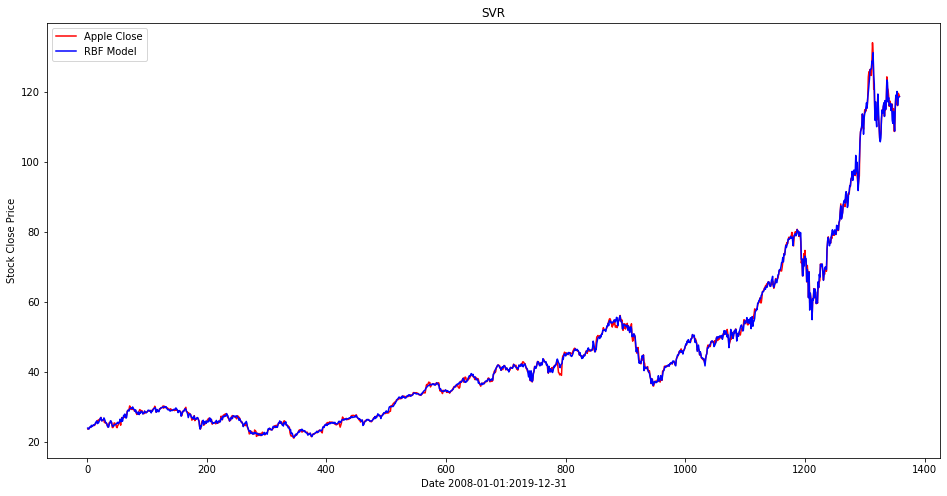

In [36]:
plt.figure(figsize=(16,8))
plt.title('SVR')
plt.plot(day_count, y, color='red',label='Apple Close')
# plt.plot(day_count, lin_svr.predict(X), color='green', label='Linear Model')
plt.plot(day_count, rbf_svr.predict(X), color='blue', label='RBF Model')
# plt.plot(day_count, poly_svr.predict(X), color='orange', label='Poly Model')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()